# 1. Getting started with the machine learning process.

### Import the necessary libraries.

In [52]:
import os
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

### Visualizing our data using seaborn library

<AxesSubplot:xlabel='Risk Factor 1', ylabel='count'>

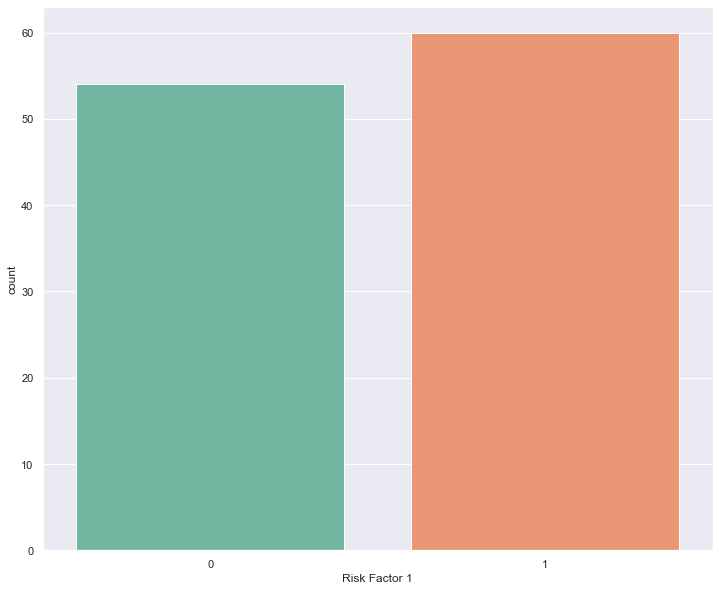

In [29]:
data = pd.read_csv("lipid_data.csv") # Reading the new dataset saved in the previous notebook

# Look at the frequency distribution for our class column Risk Factor 1
sns.countplot(x = 'Risk Factor 1', data = data, palette = 'Set2')

<AxesSubplot:xlabel='Risk Factor 2', ylabel='count'>

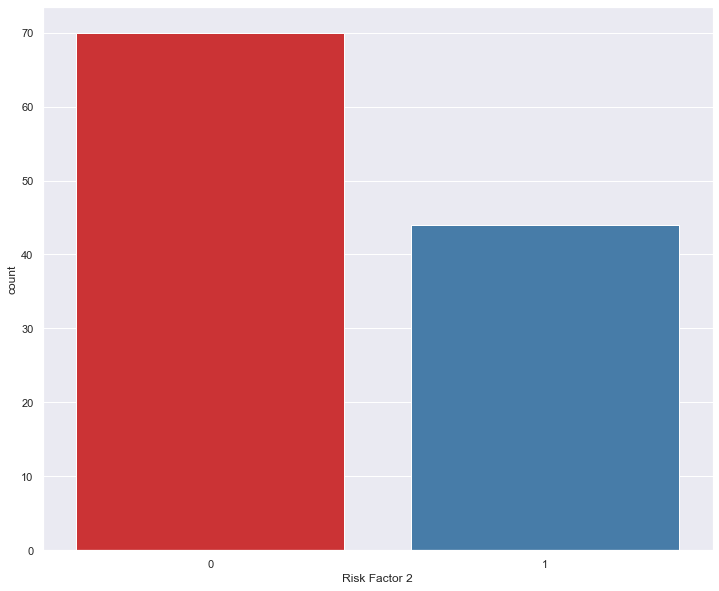

In [30]:
# Look at the frequency distribution for our class column Risk Factor 2.
sns.countplot(x = 'Risk Factor 2', data = data, palette = 'Set1')

In [32]:
data.columns

Index(['Age', 'Female', 'Male', 'Total Cholesterol Level', 'HDL Cholesterol',
       'Triglyceridies', 'LDL Cholesterol', 'TC/HDLC Ratio', 'Trigly/HDL',
       'Risk Factor 1', 'Risk Factor 2'],
      dtype='object')

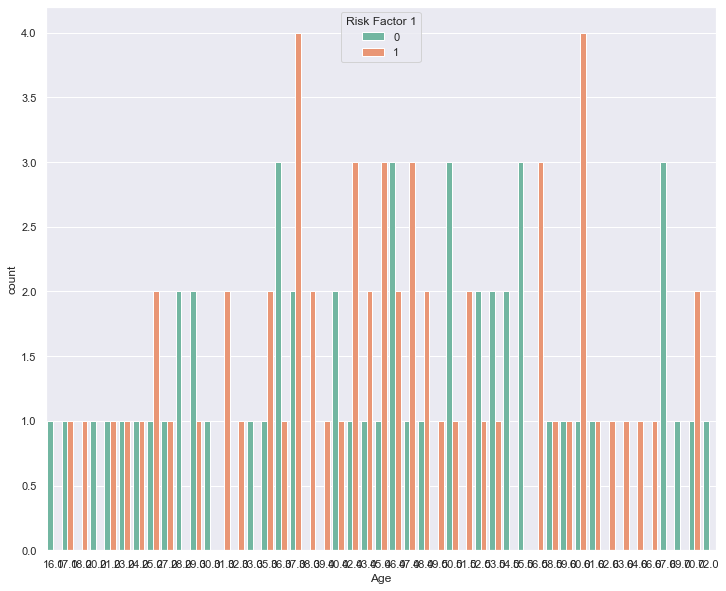

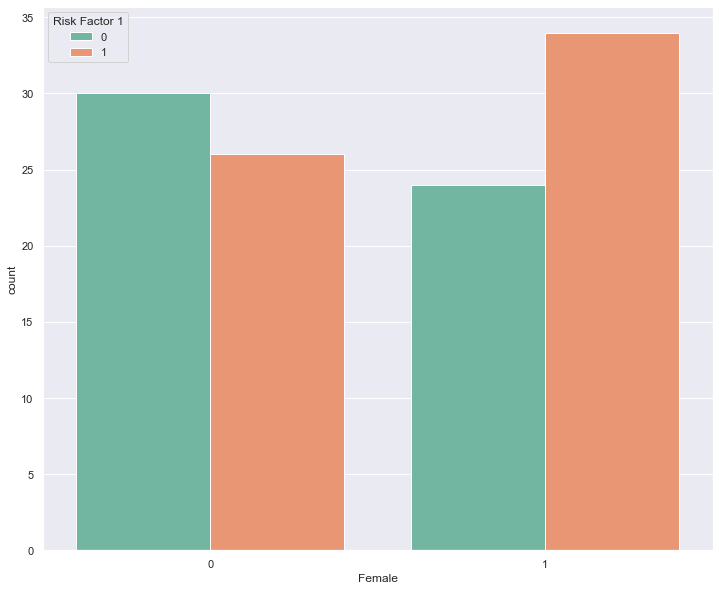

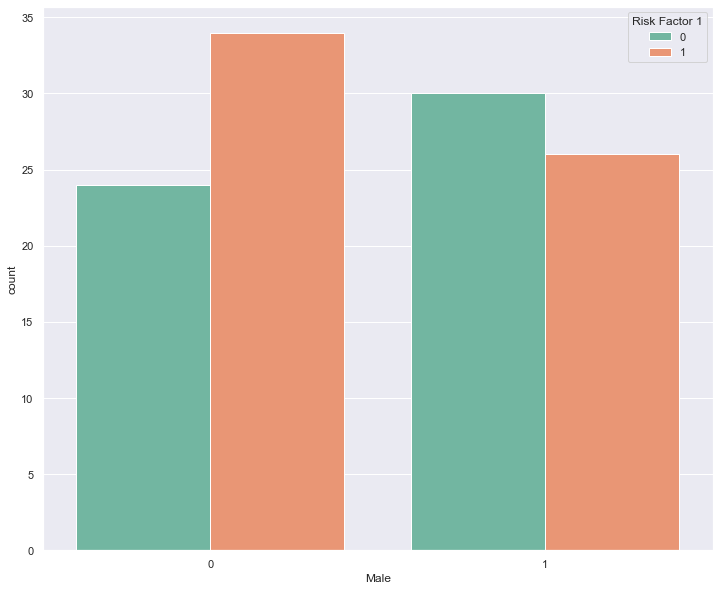

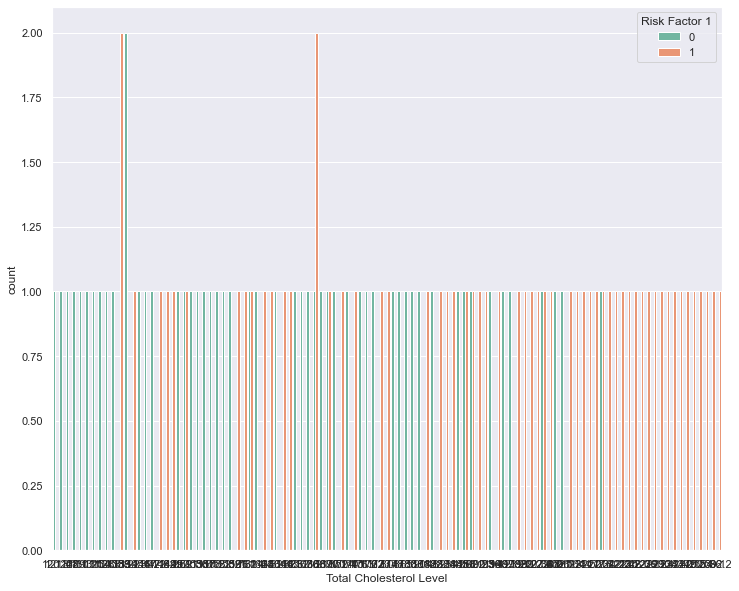

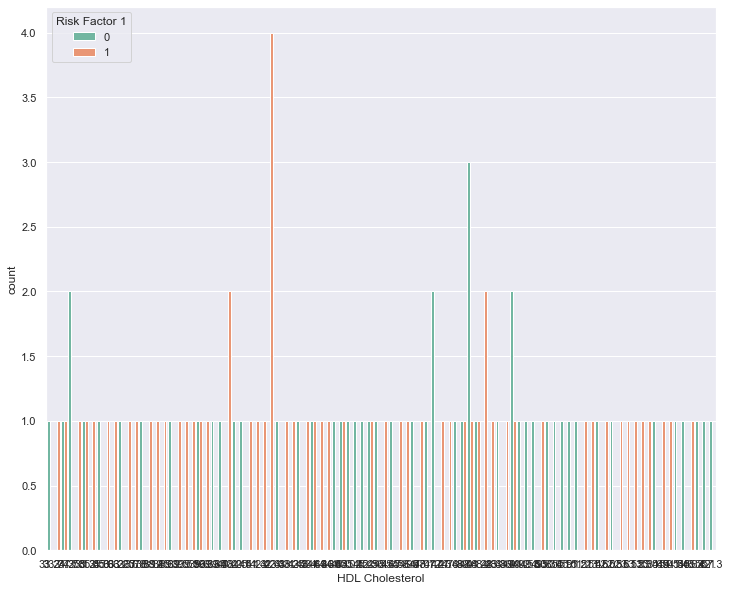

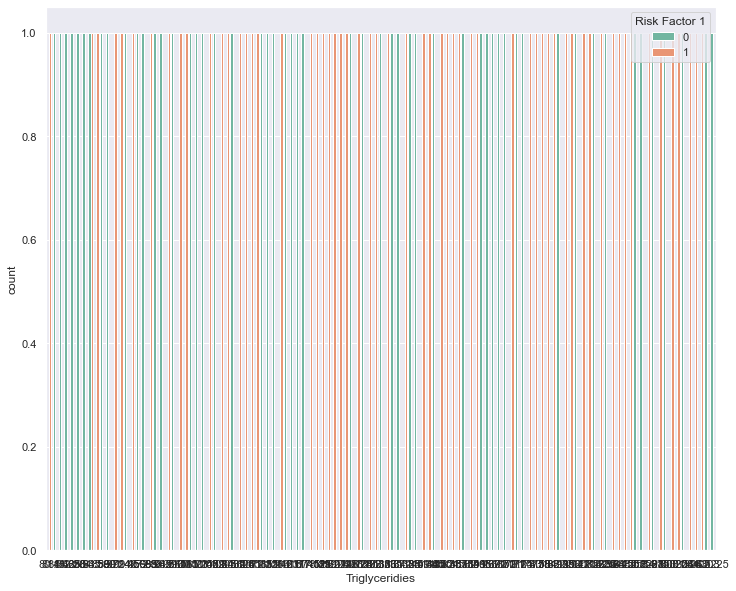

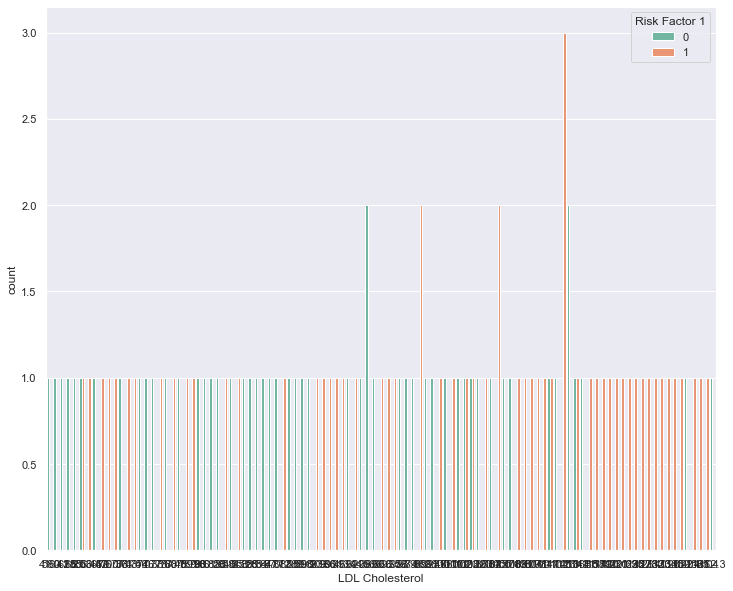

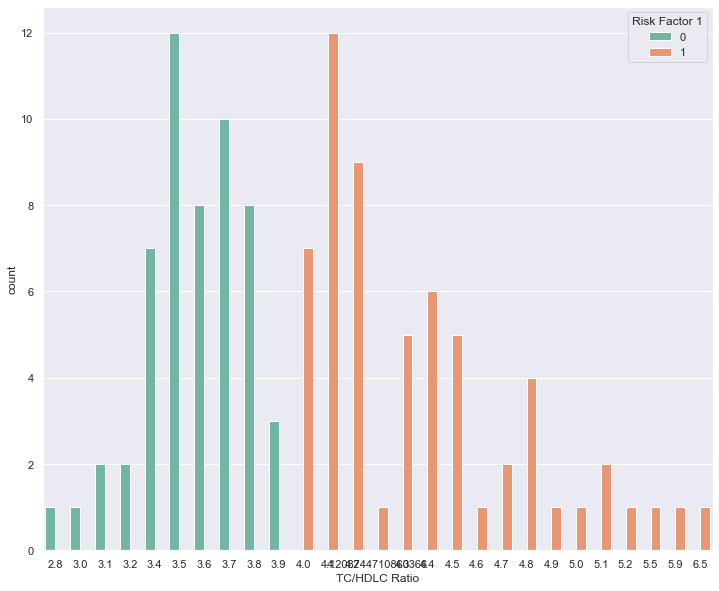

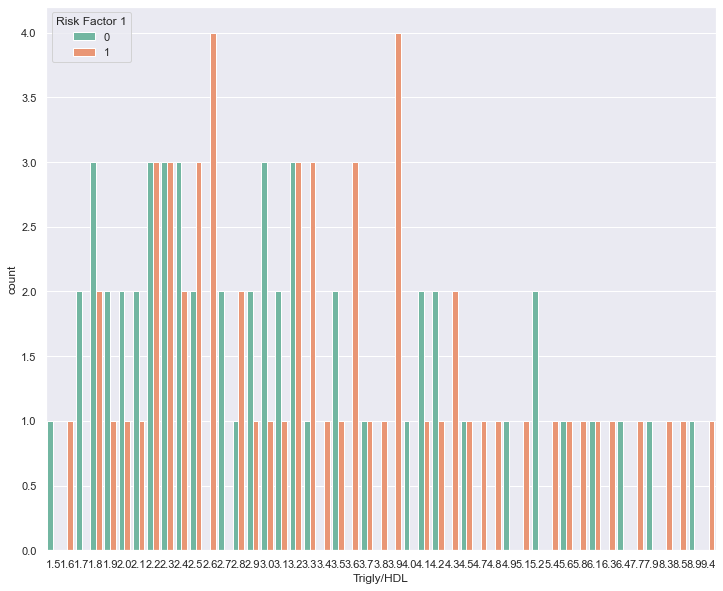

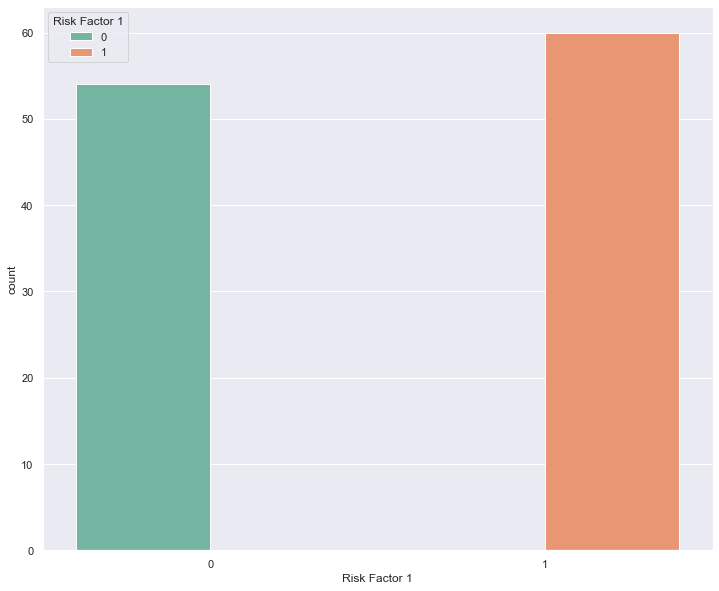

In [34]:
# Looping through all the features by our y variable - see if there is relationship.

#Lets first take into account our Risk Factor 1 variable
features = ['Age', 'Female', 'Male', 'Total Cholesterol Level', 'HDL Cholesterol',
        'Triglyceridies', 'LDL Cholesterol', 'TC/HDLC Ratio', 'Trigly/HDL',
        'Risk Factor 1']

for f in features:
     sns.countplot(x = f, data = data, palette = 'Set2', hue = 'Risk Factor 1')
     plt.show()

#### This did not give us much information and nothing can be evaluated from these charts. So lets perform another technique by using inbuilt Tree based Classifiers and running feature importance

### Feature Selection

In this example, we do not have many variables so we might use all of the data but in some cases, you have thousands of variables and you will need to filter them in order to save computational time

**Steps of Running Feature Importance**:

1. Split the data into X & y
2. Run a Tree-based estimators (i.e. decision trees & random forests)
3. Run Feature Importance

In [37]:
data.drop('Age',axis=1,inplace=True) #We dont need this column now, also it contains null values

In [39]:
# Rounding the decimal values to 1 for infinite value erros
cols = ['Total Cholesterol Level','HDL Cholesterol','Triglyceridies','LDL Cholesterol','TC/HDLC Ratio','Trigly/HDL','Risk Factor 1','Risk Factor 2']
for column in cols:
    data[column] = data[column].round(1)

In [40]:
# Split the data into X & y

# First lets consider the Risk Factor 1 column
X = data.drop(['Risk Factor 1','Risk Factor 2'], axis = 1).values
y = data['Risk Factor 1']

y = y.astype(int)

print(X.shape)
print(y.shape)

(114, 8)
(114,)


In [41]:
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [43]:
fi_col = []
fi = []

for i,column in enumerate(data.drop(['Risk Factor 1','Risk Factor 2'], axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Female is : 0.0
The feature importance for Male is : 0.0
The feature importance for Total Cholesterol Level is : 0.0
The feature importance for HDL Cholesterol is : 0.0
The feature importance for Triglyceridies is : 0.0
The feature importance for LDL Cholesterol is : 0.0
The feature importance for TC/HDLC Ratio is : 1.0
The feature importance for Trigly/HDL is : 0.0


**The above results show that only 'The feature importance for TC/HDLC Ratio is : 1.0' rest all as 0. So lets focus now on our Risk Factor 1 column for model generation.** 

# 2. Splitting the Raw Data - Hold-out validation

In [44]:
model_1 = data.drop('Trigly/HDL',axis=1,inplace=True) # We dont need this column for Risk Factor 1 class column

In [45]:
x = data.drop(['Risk Factor 1','Risk Factor 2'],axis=1)
y = data['Risk Factor 1']
y = y.astype(int)
y

print(x.shape)
print(y.shape)

(114, 7)
(114,)


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(81, 7)
(23, 7)
(10, 7)
(81,)
(23,)
(10,)


**Investigating the distribution of y_test class variables for Risk factor 1**.

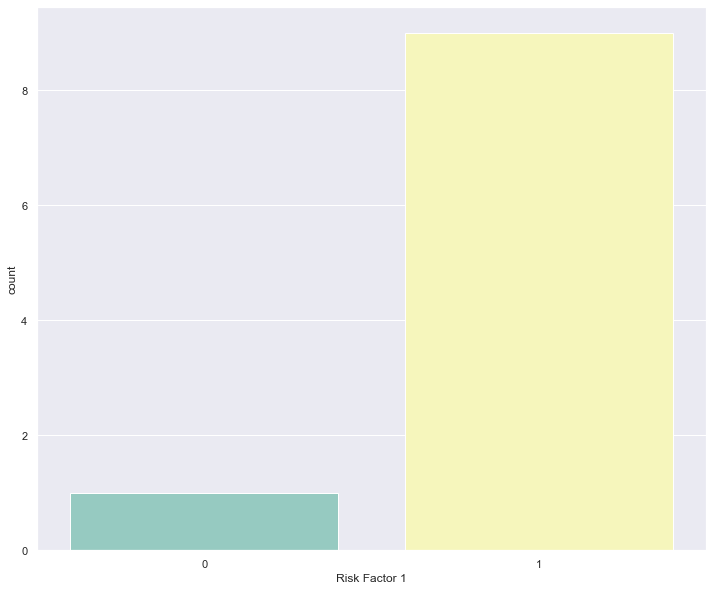

In [48]:
ax = sns.countplot(x = y_valid, palette = "Set3")

# 3.What is Logistic Regression

1. Famous statistical method for predicting two or more binary classes; not continues numbers.
2. Hence, Logistic regression is used for classification problems
3. To make it work, we transform our linear regression line into a logistic regression curve so we can get a good fit of our data (see pics below)

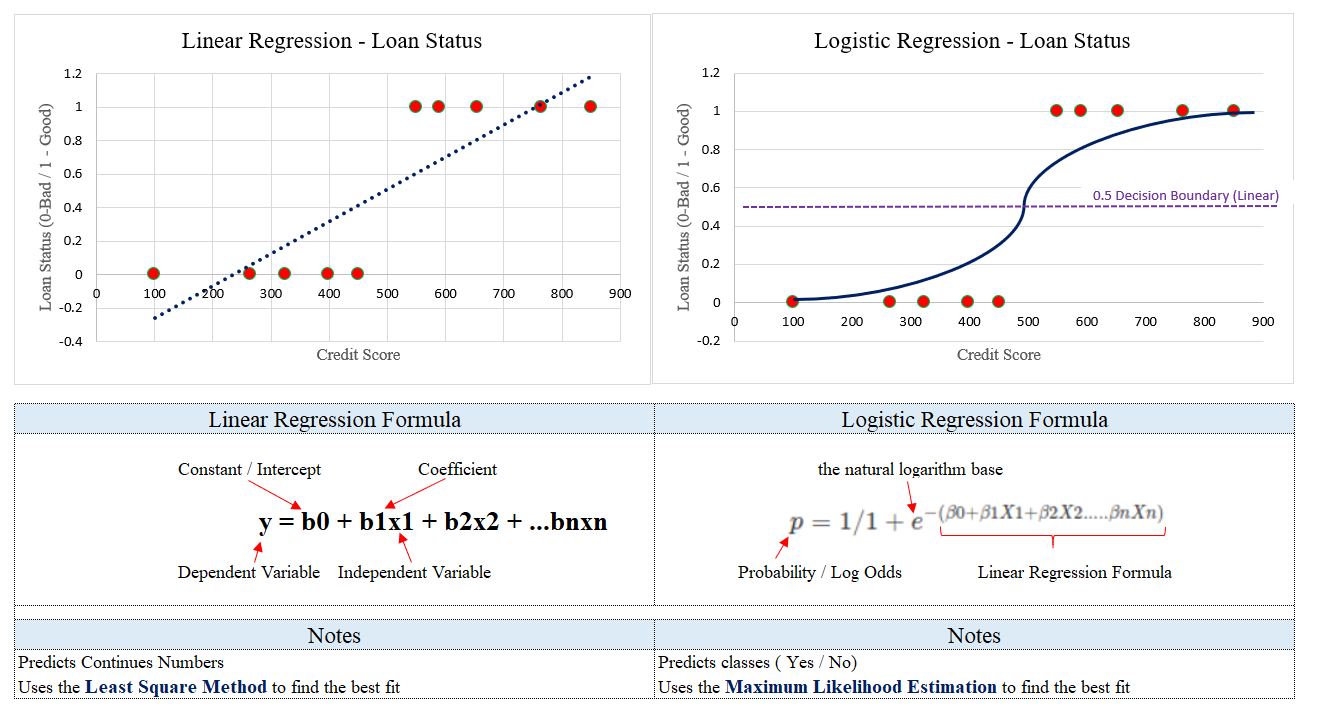

In [53]:
### Graphical

PATH = "./"
Image(filename = PATH + "ml_image1.png", width=900, height=900)

**How it works:**<br>

1. We fit an "S" Shape logistic Function
2. The curve tells you the porbability if a loan is good or bad
3. If we have a high Credit score, there is a high probability that it's a good loan

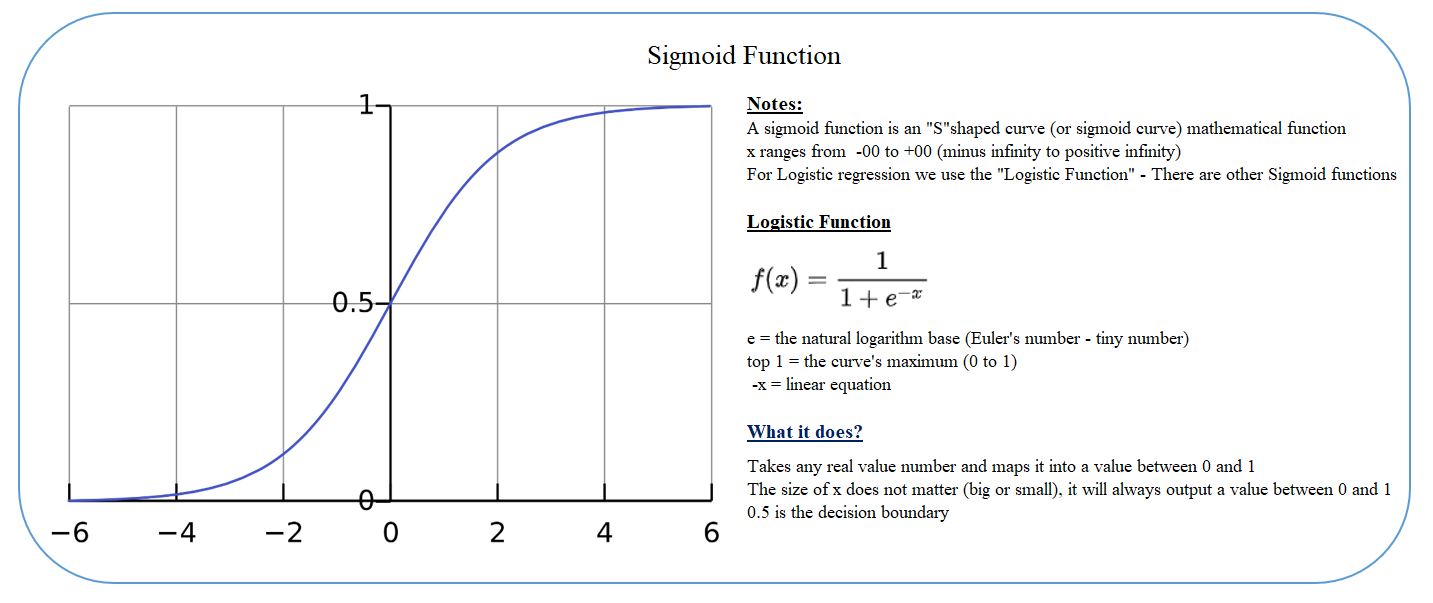

In [54]:
PATH = "./"
Image(filename = PATH + "ml_image2.png", width=900, height=900)

<h3>How Maximum likelihood works<h3>

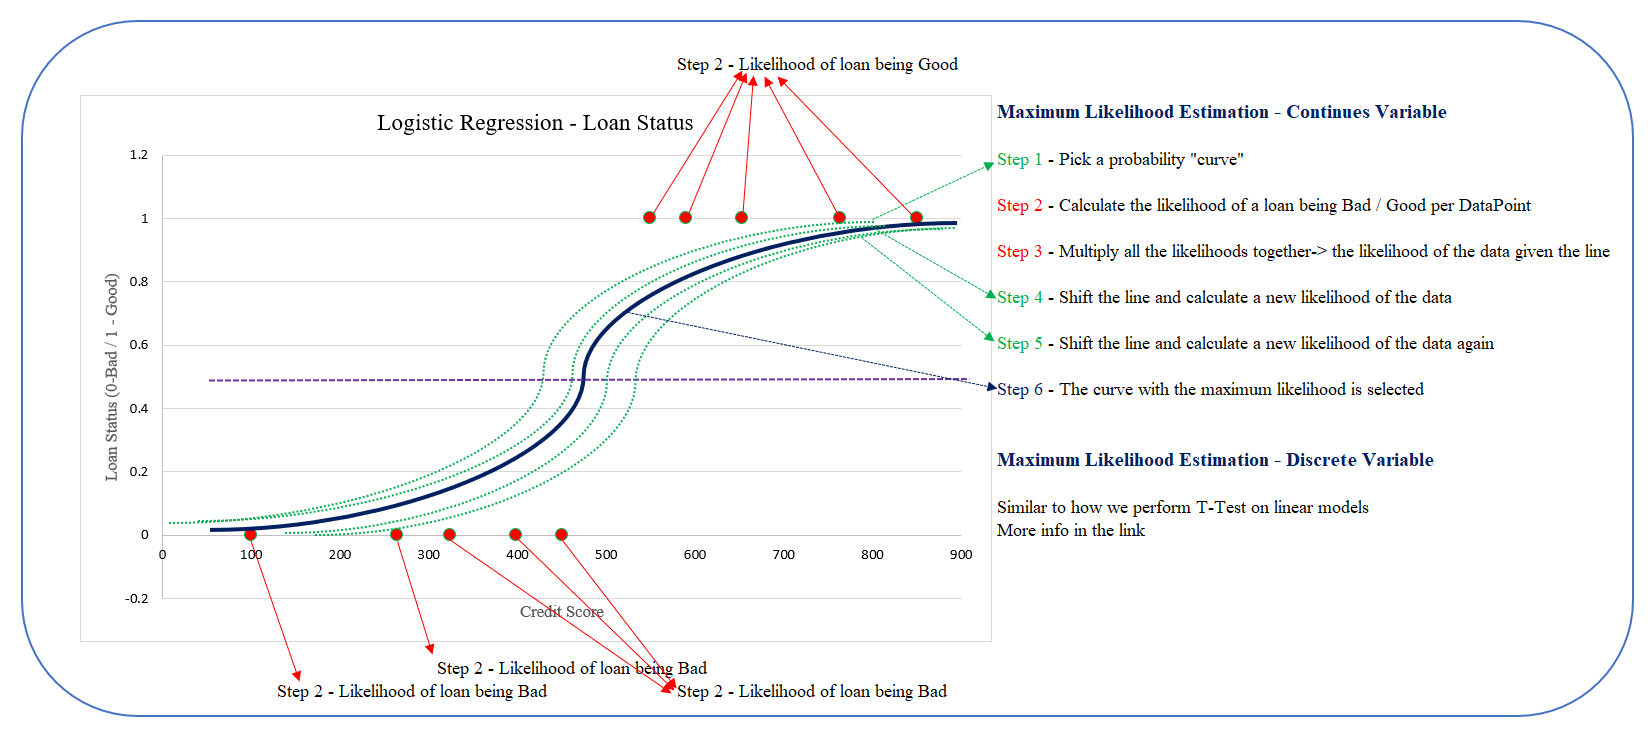

In [55]:
PATH = "./"
Image(filename = PATH + "ml_image3.png", width=900, height=900)

# 4. Running Logistic Regression

In [56]:
# Training my model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(x_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [59]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(x_train)
y_pred = log_reg.predict(x_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(x_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[0.073191, -0.023552, 0.455305, -1.868153, -0.000885, 0.006440,
        0.473048]])

# 5. Evaluating the Model

In [60]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [61]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

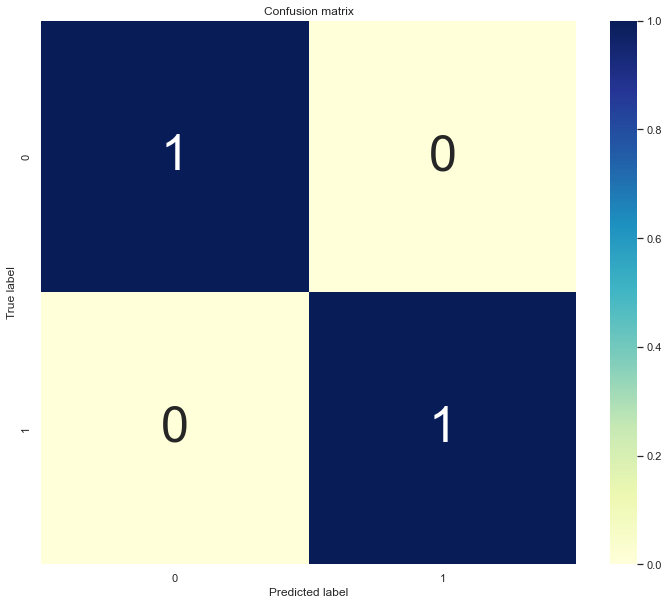

In [62]:
# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [63]:
log_reg.classes_

array([0, 1])

In [64]:
cm.sum(axis=1)
cm_norm

array([[1.000000, 0.000000],
       [0.000000, 1.000000]])

In [65]:
cm

array([[37,  0],
       [ 0, 44]], dtype=int64)

In [66]:
cm.sum(axis=0)

array([37, 44], dtype=int64)

In [67]:
np.diag(cm)

array([37, 44], dtype=int64)

In [68]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [1.000000 1.000000]
The Precision is: [1.000000 1.000000]
The False positive rate is: [0.000000 0.000000]
The False Negative Rate is:  [0.000000 0.000000]

The average TPR is: 1.0
The average Precision is: 1.0
The average False positive rate is: 0.0
The average False Negative Rate is: 0.0


## Our results show that there are no false predictions and our predictions are 100 percent accurate which is practically not possible in real life scenario. But due to our limited data we get this result. So for our model there is no need of hyper parameter tuning.

### These same steps can be used for our Risk Factor 2 column and model can be generated. It will give us the same results as the data is limited. So that part will also be skipped.